# Exercises

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
diamonds = pd.read_csv('diamonds.csv',index_col=0)

## Task 1: Basics

- have a look at the diamonds dataset: how many rows do we have?, what are the different columns?
- create a DataFrame consisting only of the x, y and z columns
- access row 5 to 15 in diamonds
- create a DataFrame consisting only of row 5 to 15 and name the rows "A" to "K" (hint: each DataFrame has an .index attribute which can be modified)
- access row "C" in the DataFrame you just created
- use the mixed access operator (.ix) to get the price of the 500th diamond
- group the diamnods by color and compute the mean of the price
- find all the diamonds with more than 2 carat and plot their price distribution in a histogram
- compute and plot the standard deviation of the x dimension for the different cuts



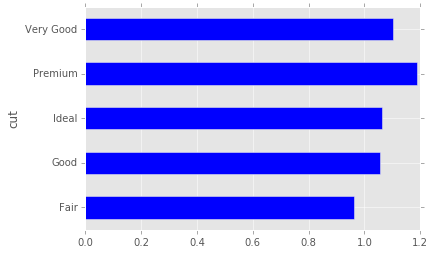

In [2]:
d2 =diamonds.iloc[:,-3:]
d3=diamonds.iloc[4:15]
rows = ['A','B','C','D','E','F','G','H','I','J','K']
d3.index=rows
d3.loc['C']
diamonds.ix[500,'price']
diamonds.groupby('color')['price'].mean()
#d4=diamonds[diamonds['carat']>2]
#d4['price'].plot(kind='hist')

d5=diamonds.groupby('cut')
d5['x'].std().plot(kind='barh')

###Task 2: Import the "Kernmerkmale Bevölkerung (Geschlecht, Deutsche/Ausländer, 5 Altersgruppen)" data set

https://www.destatis.de/DE/PresseService/Presse/Pressekonferenzen/2013/Zensus2011/zensus_pk.html

download the excel file and use the `read_excel` method in pandas (hint: useful arguments are `sheetname`, `header` and `index_col`

In [68]:
df = pd.read_excel('demo_excel.xls',sheetname='Demographie',header=3)

### Task 4: Create a new DataFrame containing only the "Bundesländer" (hint: use the corresponding SATZART key)

In [69]:
dbund=df[df['SATZART']==10]
dbund

,SATZART,AGS,NAME,EWZ,EW_M,EW_W,EW_D,EW_A,ALTER_1,ALTER_2,ALTER_3,ALTER_4,ALTER_5
1,10,1,Schleswig-Holstein,2800119,1360530,1439590,2683670,116450,477010,362390,790060,563490,607170
1304,10,2,Hamburg,1706696,826140,880560,1495810,210890,267800,275420,537600,301700,324180
1309,10,3,Niedersachsen,7777992,3804410,3973590,7351250,426750,1356370,1049040,2188170,1569480,1614940
2807,10,4,Bremen,650863,316110,334750,580340,70520,98850,105260,181880,126940,137940
2815,10,5,Nordrhein-Westfalen,17538251,8521230,9017020,15931170,1607080,2984650,2481470,4993250,3525620,3553260
3666,10,6,Hessen,5971816,2914740,3057080,5311720,660090,1005660,834310,1746430,1205160,1180260
4548,10,7,Rheinland-Pfalz,3989808,1950420,2039380,3718250,271560,664260,562230,1109500,841540,812270
7103,10,8,Baden-Württemberg,10486660,5133480,5353190,9353030,1133630,1853540,1547500,2997710,2053400,2034520
8713,10,9,Bayern,12397614,6062910,6334700,11383180,1014430,2112190,1797760,3613220,2459360,2415070
12255,10,10,Saarland,999623,485380,514240,933360,66270,148980,135930,269470,224680,220560


### Task 5: Plot the age composition of the different Bundesländer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 5 columns):
ALTER_1    16 non-null int64
ALTER_2    16 non-null int64
ALTER_3    16 non-null int64
ALTER_4    16 non-null int64
ALTER_5    16 non-null int64
dtypes: int64(5)
memory usage: 768.0 bytes


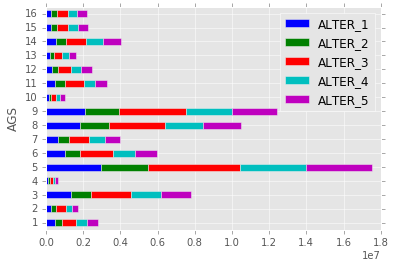

In [45]:
alter=dbund.iloc[:,-5:]

alter.plot(kind='barh',stacked=True)
alter.info()

### Task 6: ...and now relative to the population in each Bundesland (hint the .div method of a DataFrame can be used to divide two dataframes)

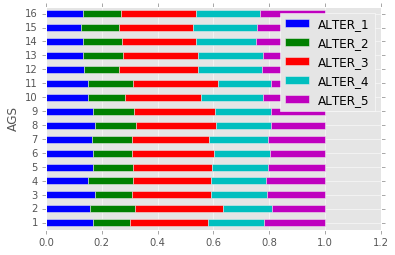

In [49]:
divisor=dbund['EWZ']
divisor
alter.div(divisor,axis=0).plot(kind='barh',stacked=True)

### Task 7: Plot pie charts of the relative age distribution in Berlin and Sachsen

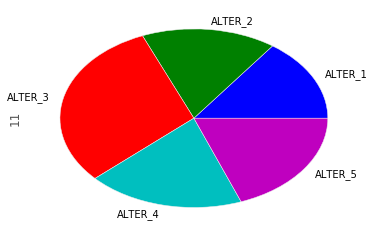

In [57]:
rela=alter.div(divisor,axis=0)
rela.loc[11].plot(kind='pie')

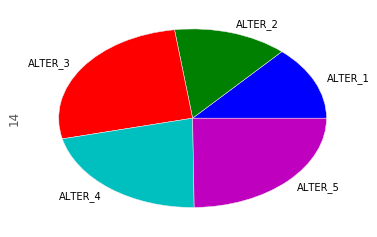

In [56]:
rela.loc[14].plot(kind='pie')

###Task 8: Import a health care data set from Zeit online 

The file is in the git repository: `multiresistente_keime.xlsx`. Import it using the `read_excel` function.


In [67]:
dmed = pd.read_excel('multiresistente_keime.xlsx',sheetname='Landkreis-Daten',header=0)
dmed

,Kreisschlussel,Bundesland,Landkreis/Kreisfreie Stadt,Krankenhaus- Patienten 2013,MRE-Fälle 2013,MRE-Fälle pro 1000 Krankenhauspatienten 2013,ESBL-Diagnosen 2013,ESBL-Diagnosen pro 1000 Krankenhauspatienten 2013,VRE-Diagnosen 2013,VRE Diagnosen pro 1000 Krankenhauspatienten 2013,MRSA-Diagnosen 2013,MRSA Diagnosen pro 1000 Krankenhauspatienten 2013,MRE Veränderung 2010-2013 in %,ESBL Veränderung 2010-2013 in %,VRE Veränderung 2010-2013 in %,MRSA Veränderung 2010-2013 in %,MRSA Meldungen an Robert Koch-Institut 2013
0,1057,Schleswig-Holstein,Plön,26634,97,3.641961,126,4.730795,33,1.239018,184,6.908463,-13,26,57,-2,-
1,6431,Hessen,Bergstraße,54563,315,5.773143,289,5.296630,113,2.071000,315,5.773143,-8,46,92,-17,-
2,6635,Hessen,Waldeck-Frankenberg,44049,385,8.740267,450,10.215896,114,2.588027,478,10.851552,107,217,268,90,-
3,7111,Rheinland-Pfalz,"Koblenz, kreisfreie Stadt",24518,167,6.811322,155,6.321886,40,1.631454,180,7.341545,24,52,400,14,-
4,7313,Rheinland-Pfalz,"Landau in der Pfalz, kreisfreie Stadt",11227,51,4.542620,135,12.024584,24,2.137704,37,3.295627,19,146,-4,-5,-
5,7317,Rheinland-Pfalz,"Pirmasens, kreisfreie Stadt",11080,57,5.144404,90,8.122744,17,1.534296,96,8.664260,-42,88,70,-28,-
6,7319,Rheinland-Pfalz,"Worms, kreisfreie Stadt",19288,140,7.258399,161,8.347159,82,4.251348,129,6.688096,51,274,310,22,-
7,7333,Rheinland-Pfalz,Donnersbergkreis,18823,54,2.868831,183,9.722148,70,3.718855,87,4.622005,15,103,75,-38,-
8,7335,Rheinland-Pfalz,"Kaiserslautern, Kreis",22337,70,3.133814,184,8.237454,86,3.850114,112,5.014102,-20,117,8,-24,-
9,7336,Rheinland-Pfalz,Kusel,18611,74,3.976143,152,8.167213,84,4.513460,137,7.361238,-40,62,2,-29,-


### Task 9: Merge the two data sets (hint: "Kreisschlüssel" is the same as "AGS")

In [71]:
dmedt=pd.merge(dmed,df,left_on='Kreisschlussel',right_on='AGS')
dmedt

,Kreisschlussel,Bundesland,Landkreis/Kreisfreie Stadt,Krankenhaus- Patienten 2013,MRE-Fälle 2013,MRE-Fälle pro 1000 Krankenhauspatienten 2013,ESBL-Diagnosen 2013,ESBL-Diagnosen pro 1000 Krankenhauspatienten 2013,VRE-Diagnosen 2013,VRE Diagnosen pro 1000 Krankenhauspatienten 2013,...,EWZ,EW_M,EW_W,EW_D,EW_A,ALTER_1,ALTER_2,ALTER_3,ALTER_4,ALTER_5
0,1057,Schleswig-Holstein,Plön,26634,97,3.641961,126,4.730795,33,1.239018,...,127676,61700,65980,124990,2690,21980,13400,34930,27200,30170
1,6431,Hessen,Bergstraße,54563,315,5.773143,289,5.296630,113,2.071000,...,260741,127380,133370,238570,22170,43100,32890,74310,56610,53830
2,6635,Hessen,Waldeck-Frankenberg,44049,385,8.740267,450,10.215896,114,2.588027,...,158990,78170,80820,152480,6510,27470,20310,43310,33660,34240
3,7111,Rheinland-Pfalz,"Koblenz, kreisfreie Stadt",24518,167,6.811322,155,6.321886,40,1.631454,...,107825,51350,56480,98700,9120,16070,17380,29670,21030,23680
4,7313,Rheinland-Pfalz,"Landau in der Pfalz, kreisfreie Stadt",11227,51,4.542620,135,12.024584,24,2.137704,...,43361,20450,22910,40620,2740,6570,7800,12430,8220,8330
5,7317,Rheinland-Pfalz,"Pirmasens, kreisfreie Stadt",11080,57,5.144404,90,8.122744,17,1.534296,...,40887,19560,21330,38820,2070,6110,5410,10230,8910,10210
6,7319,Rheinland-Pfalz,"Worms, kreisfreie Stadt",19288,140,7.258399,161,8.347159,82,4.251348,...,79207,38090,41120,70830,8370,13400,11820,22100,16230,15660
7,7333,Rheinland-Pfalz,Donnersbergkreis,18823,54,2.868831,183,9.722148,70,3.718855,...,76032,37462,38570,72197,3835,13526,9750,21199,16975,14582
8,7335,Rheinland-Pfalz,"Kaiserslautern, Kreis",22337,70,3.133814,184,8.237454,86,3.850114,...,105283,51458,53824,99864,5418,18320,13913,28670,23376,21003
9,7336,Rheinland-Pfalz,Kusel,18611,74,3.976143,152,8.167213,84,4.513460,...,72781,35905,36875,70454,2326,11647,9273,19269,16902,15689


###  Task 10: Plot number of hospitalized patients per inhabitant against relative number of old people (65+)

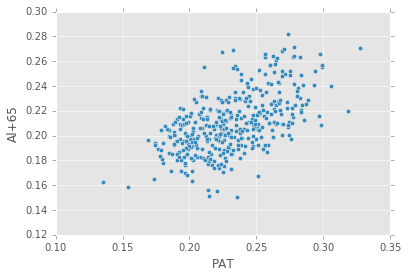

In [100]:
divisor=dmedt['EWZ']
al65=dmedt['ALTER_5']
plt65=al65/divisor
pat=dmedt['Krankenhaus- Patienten 2013']
pltpat=pat/divisor
dmedt['PAT']=pltpat
dmedt['Al+65']=plt65
dmedt.plot(x='PAT',y='Al+65',kind='scatter')

### Task 11: Compute the correlation

In [106]:
dcor=dmedt.iloc[ : ,-3: ]
dcor.corr()

,PAT,Al65,Al+65
PAT,1.000000,0.576673,0.576673
Al65,0.576673,1.000000,1.000000
Al+65,0.576673,1.000000,1.000000


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


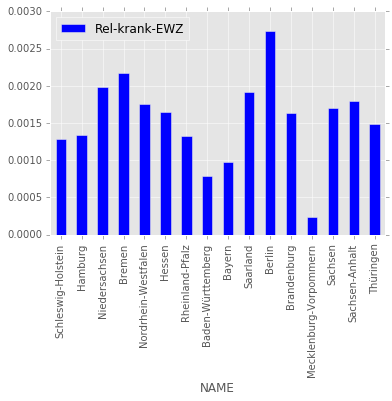

In [153]:
dSH=dmedt[dmedt['Bundesland']=='Schleswig-Holstein']
z1=dSH['MRE-Fälle 2013'].sum()

dBy=dmedt[dmedt['Bundesland']=='Bayern']
z9=dBy['MRE-Fälle 2013'].sum()

dB=dmedt[dmedt['Bundesland']=='Berlin']
z11=dB['MRE-Fälle 2013'].sum()

dBw=dmedt[dmedt['Bundesland']=='Baden-Württemberg']
z8=dBw['MRE-Fälle 2013'].sum()

dHs=dmedt[dmedt['Bundesland']=='Hessen']
z6=dHs['MRE-Fälle 2013'].sum()

dH=dmedt[dmedt['Bundesland']=='Hamburg']
z2=dH['MRE-Fälle 2013'].sum()

dBr=dmedt[dmedt['Bundesland']=='Bremen']
z4=dBr['MRE-Fälle 2013'].sum()

dS=dmedt[dmedt['Bundesland']=='Saarland']
z10=dS['MRE-Fälle 2013'].sum()

dRp=dmedt[dmedt['Bundesland']=='Rheinland-Pfalz']
z7=dRp['MRE-Fälle 2013'].sum()

dNw=dmedt[dmedt['Bundesland']=='Nordrhein-Westfalen']
z5=dNw['MRE-Fälle 2013'].sum()

dN=dmedt[dmedt['Bundesland']=='Niedersachsen']
z3=dN['MRE-Fälle 2013'].sum()

dBb=dmedt[dmedt['Bundesland']=='Brandenburg']
z12=dBb['MRE-Fälle 2013'].sum()

dMv=dmedt[dmedt['Bundesland']=='Mecklenburg-Vorpommern']
z13=dMv['MRE-Fälle 2013'].sum()

dSc=dmedt[dmedt['Bundesland']=='Sachsen']
z14=dSc['MRE-Fälle 2013'].sum()

dSa=dmedt[dmedt['Bundesland']=='Sachsen-Anhalt']
z15=dSa['MRE-Fälle 2013'].sum()

dT=dmedt[dmedt['Bundesland']=='Thüringen']
z16=dT['MRE-Fälle 2013'].sum()

dkr=[z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16]
dkr
dbund['MRE']=dkr
divisor=dbund['EWZ']
mr=dbund['MRE']
pltmre=mr/divisor
dbund['Rel-krank-EWZ']=pltmre
dbund
dbund.plot(x='NAME',y='Rel-krank-EWZ',kind='bar')